# Introduction:
##  Module 7 Assignment: "Logistic Regression"

The objective of this project is to create a predictive model that can determine which existing customers are most likely to purchase an additional insurance product. The project will involve all essential steps in a data science workflow, starting with exploring the data to uncover patterns, selecting key features, and preparing the data for analysis. We will also focus on refining the model and assessing its performance to ensure it delivers reliable and valuable insights. The end goal is to support the company in enhancing customer retention and optimizing its sales strategies

Team members :
- Mahesh Rajendra
- Mamatha Singh
- Bhavitha Bojja
- Nandini Srirapu

## Plan / Methodology:
1. **Data Acquisition** : The data in CSV format is retrieved from GitHub.

2. **Data Wrangling** : In this phase, raw data is transformed and structured into a more usable format for analysis and modeling.
 - Checked for Null or invalid values
 - Trrated outliers.

3. **Exploratory Data Analysis** : In this phase, the data is examined to understand its key characteristics and reveal patterns and relationships. This involves techniques such as visualizations and statistical summaries. The insights gained from this analysis assist in subsequent phases by guiding in feature selection and helping to choose the most appropriate algorithms.

4. **Data Preparation** :
- In this phase we mapped Target varibale's catogorical values(Y,N) to binery values(1,0).


- Handeled outliers with log transformations and wisconcin method with modified bounds.


5. **Feature Selection** : We used Decision Tree Classifier and calculated feature importance and selected features showing high importance score.

6. **Prepped Data Review** : After treating outliers the histograms and box plots are shown to check the presence of outliers and after feature selection, correlation matrix is shown to see the correlations of prepped data.

7. **Model Development and Evaluation**: Built 3 Logistic Regression models with different explanatory variables.

8. **Select Models** : After considering all the Matrics Second model is selected as best performing than other models and made predictions on test data.

## Data Acquisition

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Rajendramahesh/Analytical-programing-datasets/refs/heads/main/insurance%20company%20Data.csv')

In [4]:
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

,0
TARGET,0
loyalty,0
ID,0
age,0
city,0
LOR,0
prod_A,0
type_A,0
type_B,0
prod_B,0


- All features are in correct dataype
- There are know reported null values of far.

In [7]:
# summary stats
df.describe()

,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
count,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.000000,14016.0,14016.000000,14016.000000
mean,50.381778,37672.440068,35.882920,-710.950128,0.926299,0.533818,1.607877,1.918878,0.599458,379.161320,328.628207,2.0,35.882920,14.115582
std,48.471790,44855.639209,12.974634,26702.329184,0.965212,0.498873,1.508991,1.686038,0.490026,92.612207,475.616525,0.0,12.974634,11.582550
min,0.000000,1.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,2.0,5.000000,3.000000
25%,2.000000,6741.500000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.919412,219.406925,2.0,25.000000,3.000000
50%,3.000000,13514.500000,33.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,367.891493,237.656757,2.0,33.000000,15.000000
75%,99.000000,62738.000000,43.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,399.744924,264.131538,2.0,43.000000,15.000000
max,99.000000,151811.000000,102.000000,235.000000,6.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,2.0,102.000000,75.000000


## Exploratory Data Analysis

## Univariate Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

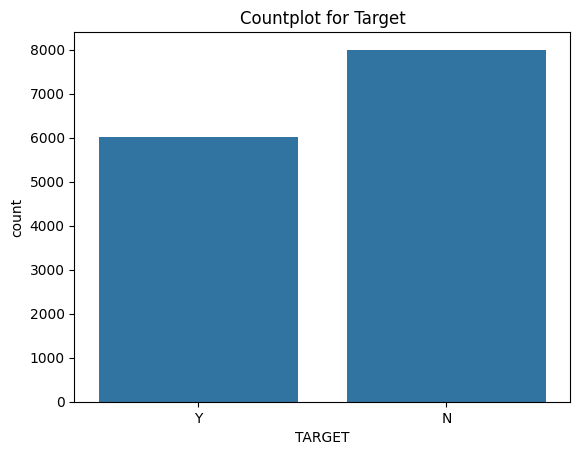

In [9]:
# countplot for Target
sns.countplot(x= 'TARGET', data=df)
plt.title('Countplot for Target')
plt.show()

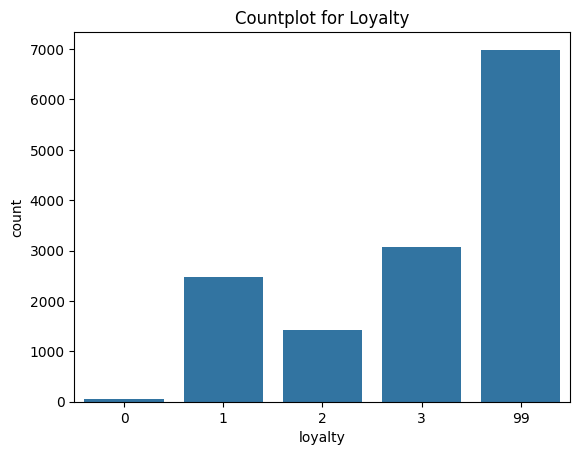

In [10]:
# countplot for loyalty with labels
sns.countplot(x='loyalty',data = df)
plt.title('Countplot for Loyalty')
plt.show()

- There are more unclassified members.






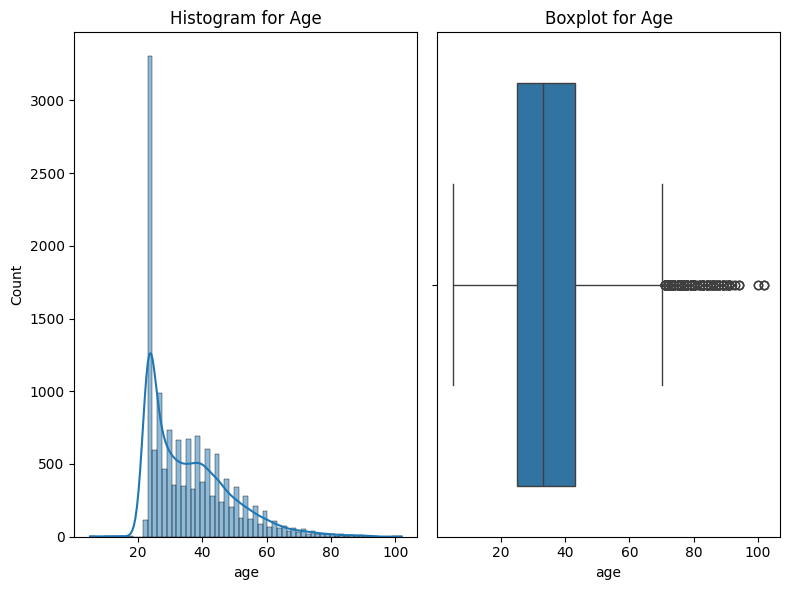

,age
count,14016.000000
mean,35.882920
std,12.974634
min,5.000000
25%,25.000000
50%,33.000000
75%,43.000000
max,102.000000


In [11]:

fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Histogram with KDE
sns.histplot(x='age', data=df, kde=True, ax=axs[0])
axs[0].set_title('Histogram for Age')

# Boxplot
sns.boxplot(x='age', data=df, ax=axs[1])
axs[1].set_title('Boxplot for Age')

plt.tight_layout()
plt.show()

df['age'].describe()

- There are outliers, data is right skewed.


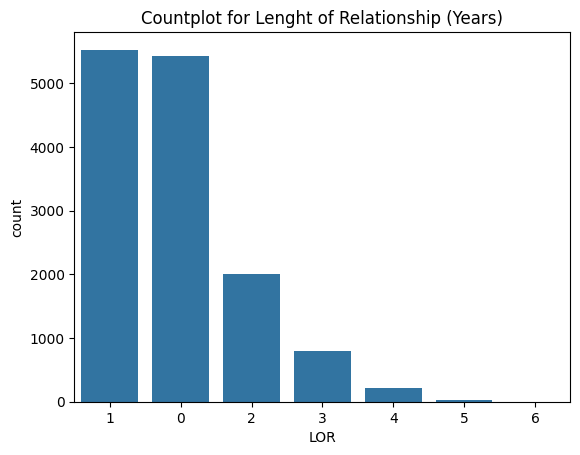

In [12]:
# countplot for LOR
sns.countplot(x='LOR',data = df,order=df['LOR'].value_counts().index)
plt.title('Countplot for Lenght of Relationship (Years)')
plt.show()

- Most of the customer has no more than one year relation with the company.

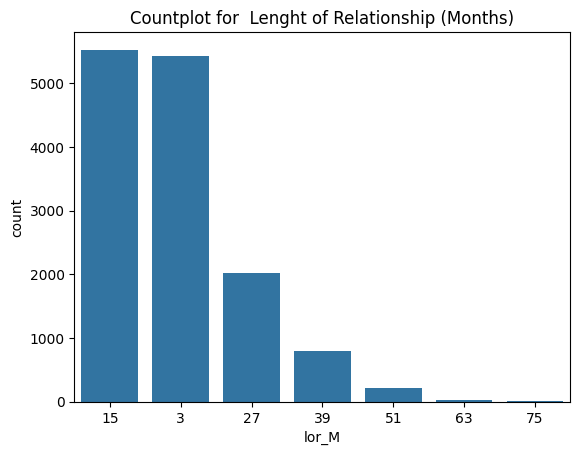

In [13]:
# Countplot for LOR_M
sns.countplot(x='lor_M',data = df,order=df['lor_M'].value_counts().index)
plt.title('Countplot for  Lenght of Relationship (Months)')
plt.show()

- Most of the custmers lasts for only 15 months.

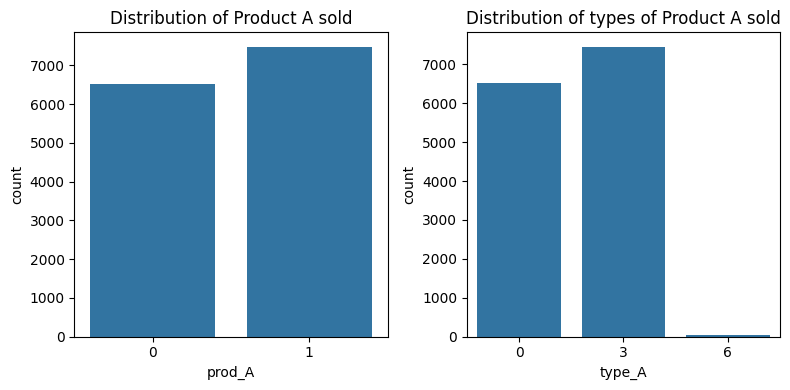

In [14]:

# countplots for Prod A
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(x='prod_A', data = df, ax = axs[0])
axs[0].set_title('Distribution of Product A sold')

sns.countplot(x='type_A', data = df, ax = axs[1])
axs[1].set_title('Distribution of types of Product A sold')

plt.tight_layout()
plt.show()

- More than 7000 customers bought Product A.
- Among the three types of Product A, type 3 is best seller.

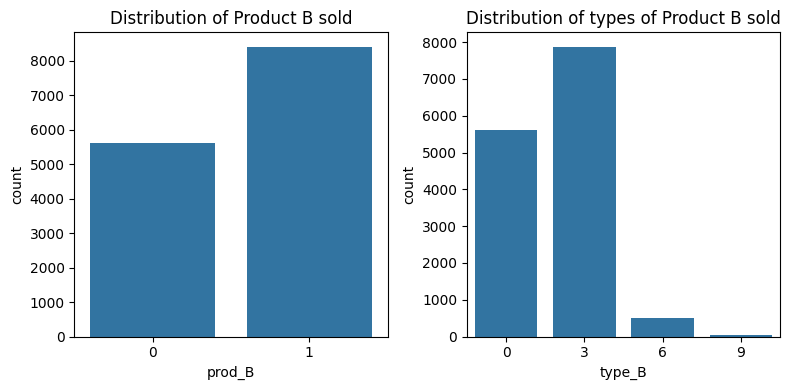

In [15]:
# Countplot for Prod_B

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.countplot(x='prod_B', data = df, ax = axs[0])
axs[0].set_title('Distribution of Product B sold')

sns.countplot(x='type_B', data = df, ax = axs[1])
axs[1].set_title('Distribution of types of Product B sold')

plt.tight_layout()
plt.show()

- More than 8000 customers bought Product B.
- Among four types of product B, the best seller is type 3.

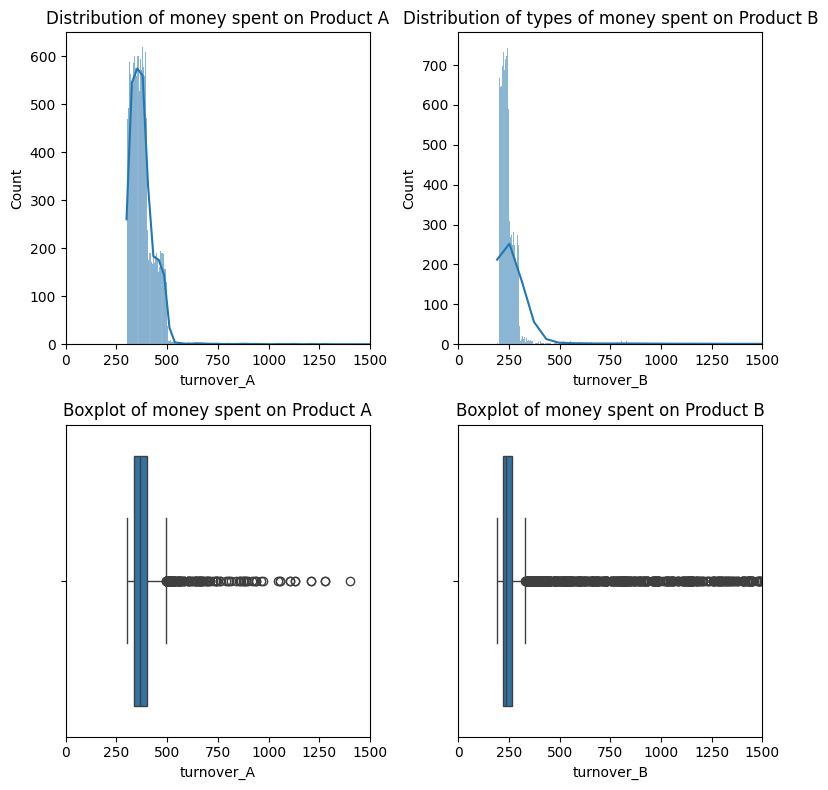

,turnover_A,turnover_B
count,14016.000000,14016.000000
mean,379.161320,328.628207
std,92.612207,475.616525
min,300.095909,191.962852
25%,334.919412,219.406925
50%,367.891493,237.656757
75%,399.744924,264.131538
max,5568.784139,12249.084770


In [16]:
# Histogrames and box plots for turnover oF prod_A and prod_B
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

#histograms
sns.histplot(x='turnover_A', data = df, ax = axs[0][0], kde = True)
axs[0][0].set_title('Distribution of money spent on Product A')
axs[0][0].set_xlim(0, 1500)

sns.histplot(x='turnover_B', data = df, ax = axs[0][1], kde = True)
axs[0][1].set_title('Distribution of types of money spent on Product B')
axs[0][1].set_xlim(0, 1500)


# boxplots
sns.boxplot(x='turnover_A', data = df, ax = axs[1][0])
axs[1][0].set_title('Boxplot of money spent on Product A')
axs[1][0].set_xlim(0, 1500)

sns.boxplot(x='turnover_B', data = df, ax = axs[1][1])
axs[1][1].set_title('Boxplot of money spent on Product B')
axs[1][1].set_xlim(0, 1500)

plt.tight_layout()
plt.show()

df[['turnover_A','turnover_B']].describe()

- From the histogram and summary statistics we can say that customers spent more on Product A than on Product B despite being more sold than product A.
- By this we can say that perhaps Product A costs more than Product B.
- There are potential outliers to be treated.

In [17]:
df['contract'].value_counts()

,count
contract,
2,14016


- There is only one type of Contract in whole dataset,so this feature can be considerable to drop as it has no variance and inluence on model.

In [18]:
# Maped Target variable to int

df_edited = df.copy()
df_edited['TARGET'] = df_edited['TARGET'].map({'N': 0, 'Y': 1})
df_edited['TARGET'].value_counts()



,count
TARGET,
0,8000
1,6016


In [19]:
# Cross checking
df['TARGET'].value_counts()

,count
TARGET,
N,8000
Y,6016


## Bivariate Analysis

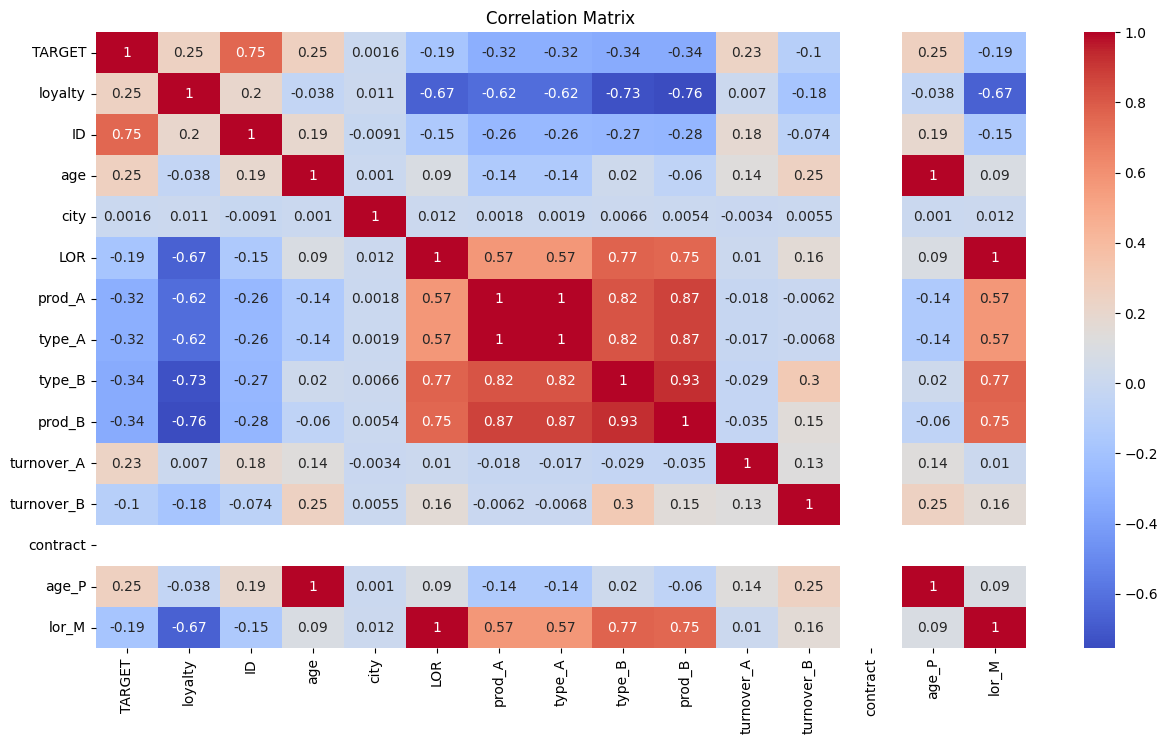

In [20]:
# plot corelation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df_edited.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


- From the Correlation matrix Loyalty, Age, Turnover_A are showing positive correlations with Target variable.

- Prod_A and Prod_B are showing negative correlation with Target variable.

- There some variable having high collinearty, indicating multi-collinearty.

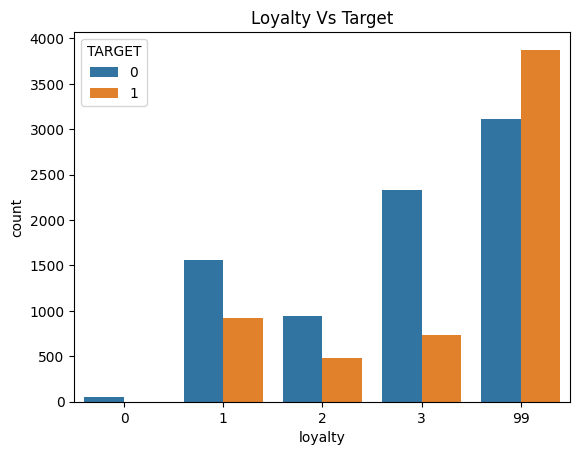

In [21]:
# Loyalty Vs Target
sns.countplot(x= 'loyalty', data=df_edited, hue='TARGET')
plt.title('Loyalty Vs Target')
plt.show()

- Customers in unclssified level of loyalty are more likely to buy new product followed by customers in loyalty level 1.

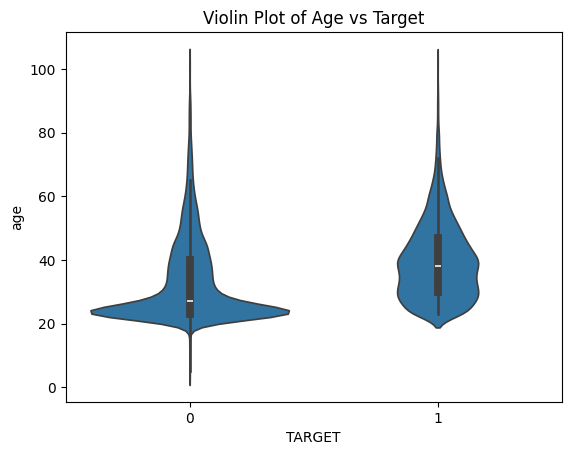

In [22]:
# Voilen plots for age and Target
sns.violinplot(x='TARGET', y='age', data=df_edited)
plt.title('Violin Plot of Age vs Target')
plt.show()

- From the violin plot we can say that, customers who are 35 years old are more likely to buy new porduct and customers of age group 20 to 25 are likely to not buy new product.

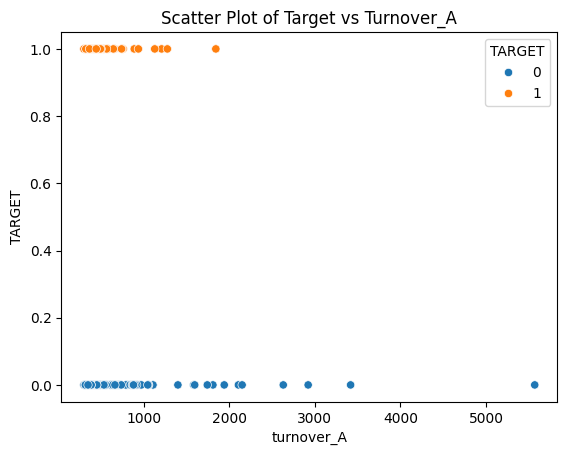

In [23]:
# Scatter plot for Target and turnover_A
sns.scatterplot(x='turnover_A', y='TARGET', data=df_edited, hue= 'TARGET' )
plt.title('Scatter Plot of Target vs Turnover_A')
plt.show()

- Customers who have less turnover_A  are the most who bought new product, as we can see the cluster in low ranges of turnover_A.

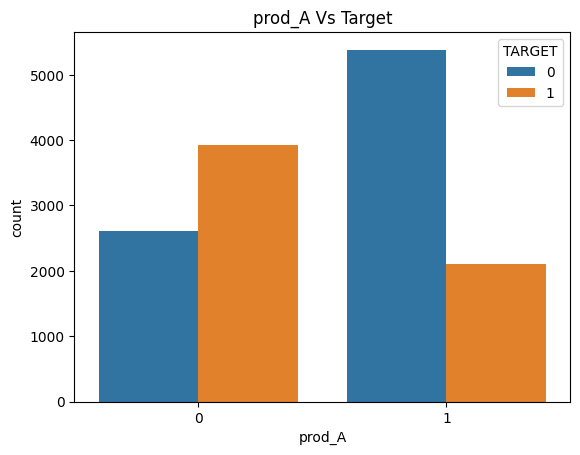

In [24]:
# ploting relation between Prod_A and Target
sns.countplot(x= 'prod_A', data=df_edited, hue='TARGET')
plt.title('prod_A Vs Target')
plt.show()

- The graph states that customers who did not buy product A are more likely to buy a new product.

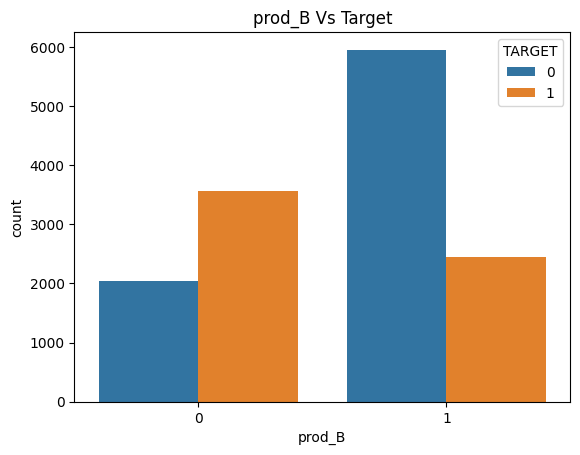

In [25]:
# ploting relation between prod_B and Target
sns.countplot(x= 'prod_B', data=df_edited, hue='TARGET')
plt.title('prod_B Vs Target')
plt.show()

- The graph states that customers who did not buy product B are more likely to buy a new product.

In [26]:
# Make a new column where customers buy both prod_A and prod_B
df_edited['prod_AB'] = df_edited['prod_A'] + df_edited['prod_B']
df_edited['prod_AB'] = df_edited['prod_AB'].map({0: 0, 1: 0, 2: 1})
df_edited['prod_AB'].value_counts()

,count
prod_AB,
1,7482
0,6534


- Made a new column (prod_AB) to examine the purchase behaviour of customers who bought both the products A and B to Target variable.

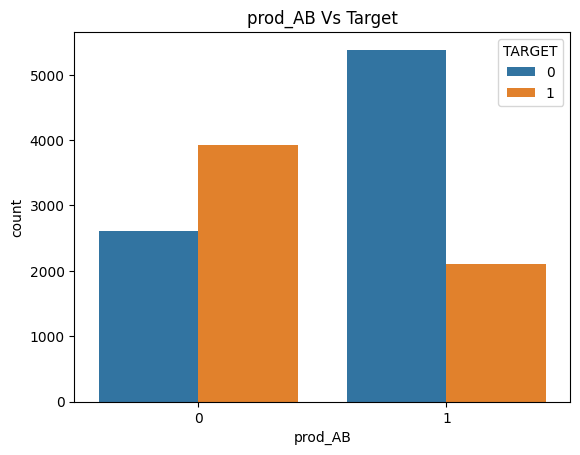

In [27]:
# ploting relation between prod_B and Target
sns.countplot(x= 'prod_AB', data=df_edited, hue='TARGET')
plt.title('prod_AB Vs Target')
plt.show()

- We can say that customers who did not buy both of the products A and B are more likely to buy new product.

In [28]:
# Drop Prod_AB
df_edited.drop('prod_AB', axis=1, inplace=True) #droped newly created column prod_AB which is used only for visualization.

## Multivariate Analysis

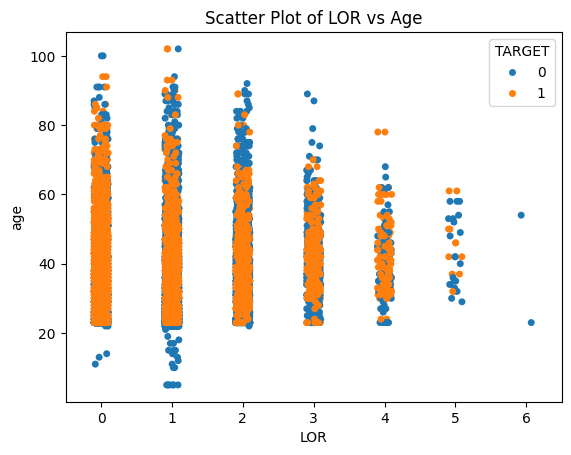

In [29]:
# Strip plot for LOR and age
sns.stripplot(y='age', x='LOR', data=df_edited, hue= 'TARGET' )
plt.title('Scatter Plot of LOR vs Age')
plt.show()


- Customers with older than around 25 years and with low LOR are more likely to buy newproduct.

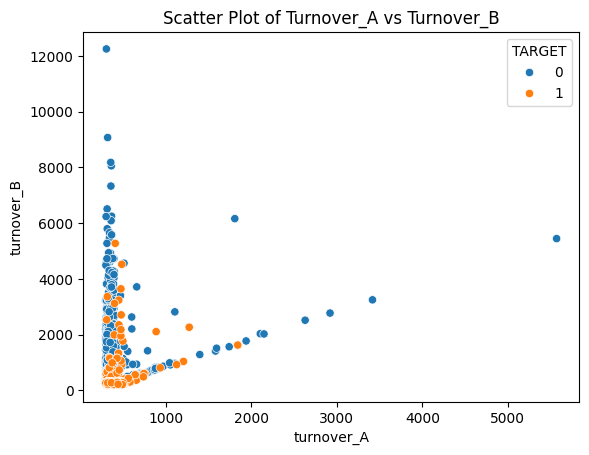

In [30]:
# Scatter plot for turnover_A and turnover_B
sns.scatterplot(x='turnover_A', y='turnover_B', data=df_edited, hue= 'TARGET' )
plt.title('Scatter Plot of Turnover_A vs Turnover_B')
plt.show()

- Customers who did not spent more on product A and product B are more likely to new a new product.

## Data Preparation and Review

In [31]:
import numpy as np

In [32]:
# log transform age
df_edited['age'] = np.log10(df_edited['age'])
df_edited['age'].describe()

,age
count,14016.000000
mean,1.529556
std,0.145460
min,0.698970
25%,1.397940
50%,1.518514
75%,1.633468
max,2.008600


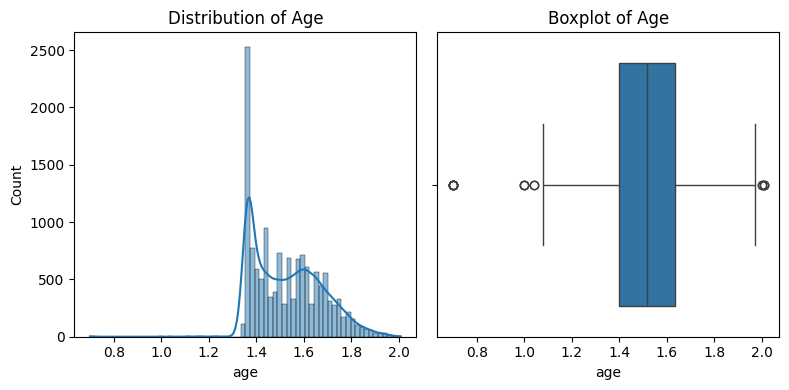

In [33]:
# Histogram and box plot for age
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(x='age', data = df_edited, ax = axs[0], kde = True)
axs[0].set_title('Distribution of Age')

sns.boxplot(x='age', data = df_edited, ax = axs[1])
axs[1].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()


- There are still some outliers, so lets try clipping method


In [34]:
# Calculate IQR for age
Q1 = df_edited['age'].quantile(0.25)
Q3 = df_edited['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip age with lower and upper bound
df_edited['age'] = df_edited['age'].clip(lower_bound, upper_bound)



- np.clip() will enable values smaller than lower_bound to become lower_bound, and values larger than upper_bound to become upper_bound.

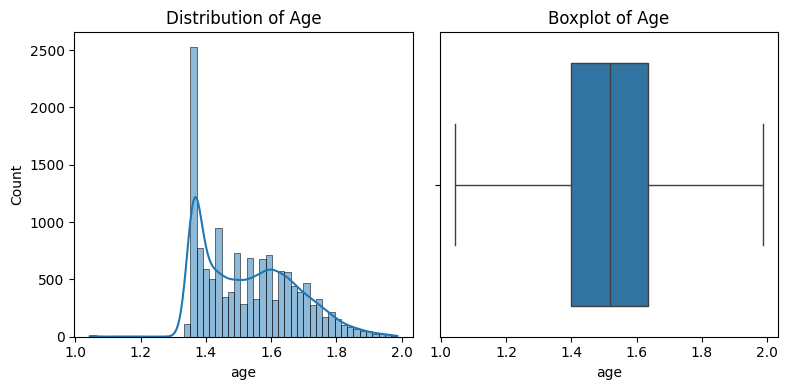

In [35]:
# Histogram and box plot for age
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(x='age', data = df_edited, ax = axs[0], kde = True)
axs[0].set_title('Distribution of Age')

sns.boxplot(x='age', data = df_edited, ax = axs[1])
axs[1].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

In [36]:
# log transform 'turnover_A' and 'turnover_B'
df_edited['turnover_A'] = np.log10(df_edited['turnover_A'])
df_edited['turnover_B'] = np.log10(df_edited['turnover_B'])

df_edited[['turnover_A','turnover_B']].describe()

,turnover_A,turnover_B
count,14016.000000,14016.000000
mean,2.572627,2.423226
std,0.066683,0.198162
min,2.477260,2.283217
25%,2.524940,2.341250
50%,2.565720,2.375950
75%,2.601783,2.421820
max,3.745760,4.088104


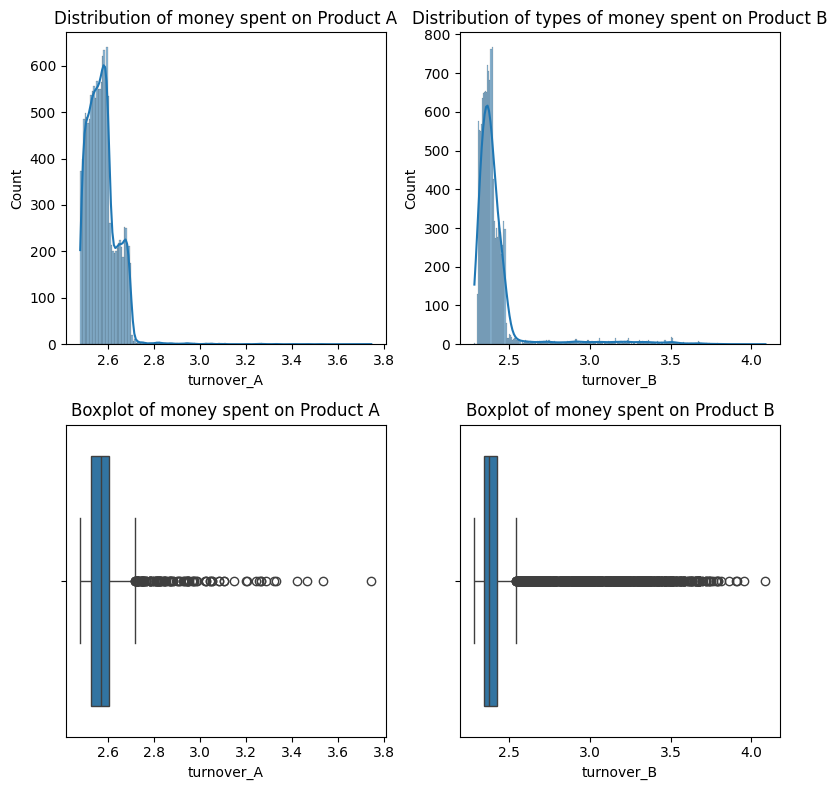

In [37]:
# Histogrames and box plots for turnover oF prod_A and prod_B
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

#histograms
sns.histplot(x='turnover_A', data = df_edited, ax = axs[0][0], kde = True)
axs[0][0].set_title('Distribution of money spent on Product A')


sns.histplot(x='turnover_B', data = df_edited, ax = axs[0][1], kde = True)
axs[0][1].set_title('Distribution of types of money spent on Product B')



# boxplots
sns.boxplot(x='turnover_A', data = df_edited, ax = axs[1][0])
axs[1][0].set_title('Boxplot of money spent on Product A')


sns.boxplot(x='turnover_B', data = df_edited, ax = axs[1][1])
axs[1][1].set_title('Boxplot of money spent on Product B')


plt.tight_layout()
plt.show()

In [38]:
# calculate IQR for 'turnover_A' and 'turnover_B'
Q1_A = df_edited['turnover_A'].quantile(0.25)
Q3_A = df_edited['turnover_A'].quantile(0.75)

Q1_B = df_edited['turnover_B'].quantile(0.25)
Q3_B = df_edited['turnover_B'].quantile(0.75)

IQR_A = Q3_A - Q1_A
IQR_B = Q3_B - Q1_B

# calculate lower and upper bound
lower_bound_A = Q1_A - 1.5 * IQR_A
upper_bound_A = Q3_A + 1.5 * IQR_A

lower_bound_B = Q1_B - 1.5 * IQR_B
upper_bound_B = Q3_B + 1.5 * IQR_B

# Clip 'turnover_A' and 'turnover_B' with lower_bound and upper_bound
df_edited['turnover_A'] = df_edited['turnover_A'].clip(lower_bound_A, upper_bound_A)
df_edited['turnover_B'] = df_edited['turnover_B'].clip(lower_bound_B, upper_bound_B)


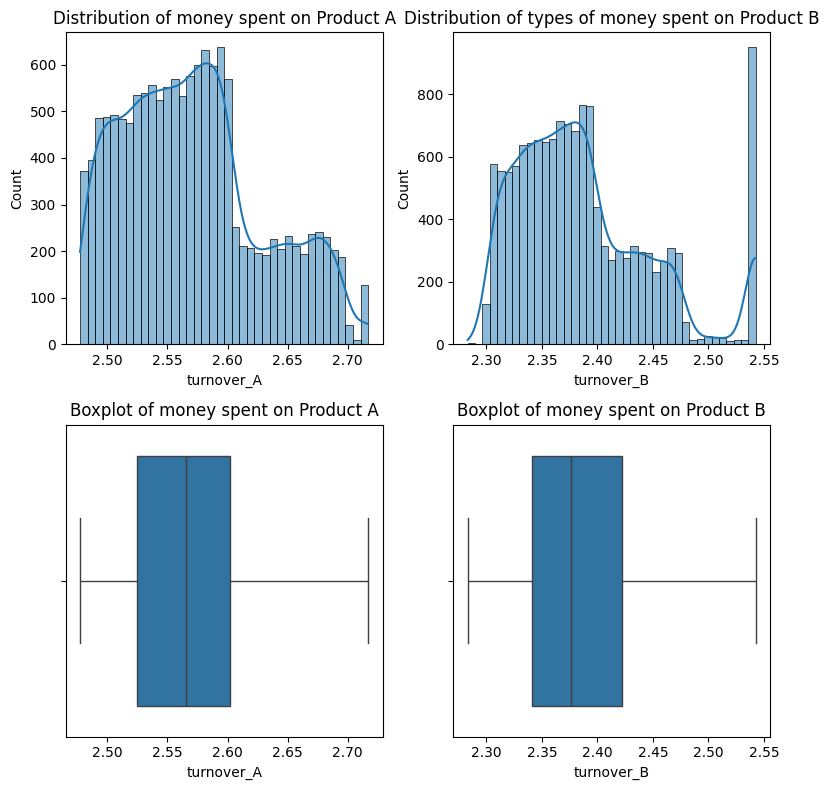

In [39]:
# Histogrames and box plots for turnover oF prod_A and prod_B
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

#histograms
sns.histplot(x='turnover_A', data = df_edited, ax = axs[0][0], kde = True)
axs[0][0].set_title('Distribution of money spent on Product A')


sns.histplot(x='turnover_B', data = df_edited, ax = axs[0][1], kde = True)
axs[0][1].set_title('Distribution of types of money spent on Product B')



# boxplots
sns.boxplot(x='turnover_A', data = df_edited, ax = axs[1][0])
axs[1][0].set_title('Boxplot of money spent on Product A')


sns.boxplot(x='turnover_B', data = df_edited, ax = axs[1][1])
axs[1][1].set_title('Boxplot of money spent on Product B')


plt.tight_layout()
plt.show()

In [40]:
# Drop ID, City
df_edited.drop(['ID','city'], axis=1, inplace=True)

- Droping Columns with IDs, codes as they dont provide any useful information for model.

- Checking for multicollinearity in dataset and droping the hightest multicollinear variable.

## Feature Selection

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
#Split target
X = df_edited.drop('TARGET', axis=1)
y = df_edited['TARGET']

In [43]:
# Train a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

DecisionTreeClassifier(random_state=42)

- Using Decision Tree Classifer for selecting features which has more importance.

In [44]:
# Get feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
feature_importance_df

Feature Importances:


,Feature,Importance
7,turnover_A,0.440717
8,turnover_B,0.359986
10,age_P,0.068051
0,loyalty,0.038803
1,age,0.038264
3,prod_A,0.016024
2,LOR,0.012860
11,lor_M,0.012419
4,type_A,0.008036
6,prod_B,0.002464


Text(0.5, 1.0, 'Feature Importances')

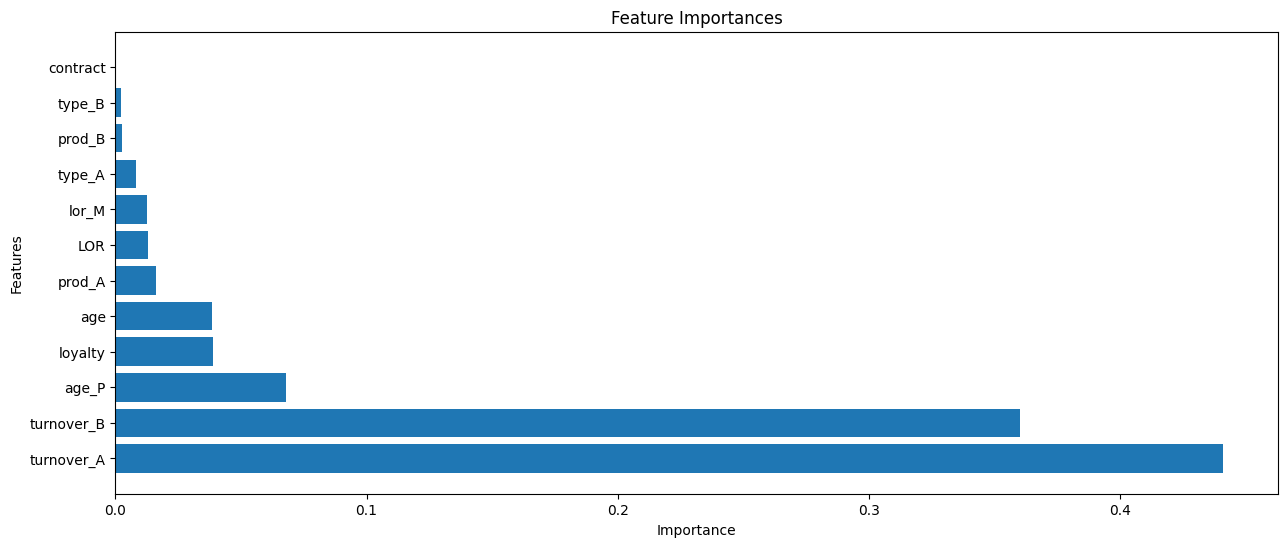

In [45]:
# Bar chart on features
plt.figure(figsize=(15, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Feature Importances')


- Based on the feature importance values, features with very low importance can potentially be dropped, as they contribute little to the predictive power of the model.
- Features with Very Low Importance (< 0.01):
  - contract
  - Prod_B
  - type_B
  - type_A

- And droping age_P feature as we have age which has exact values of age, we can also see the correlation as 1 between them.

In [46]:
# Filter out features with importance less than 0.01
features_to_drop = feature_importance_df[feature_importance_df['Importance'] < 0.01]['Feature'].tolist()
# Append age
features_to_drop.append('age_P')

# Drop the features
df_reduced = df_edited.drop(features_to_drop, axis=1)

In [47]:
df_reduced.head()


,TARGET,loyalty,age,LOR,prod_A,turnover_A,turnover_B,lor_M
0,1,99,1.819544,0,0,2.523175,2.422788,3
1,1,1,1.653213,3,1,2.596306,2.454700,39
2,1,1,1.623249,2,1,2.534256,2.542675,27
3,1,99,1.491362,0,0,2.656824,2.384428,3
4,1,99,1.792392,0,0,2.584984,2.457895,3


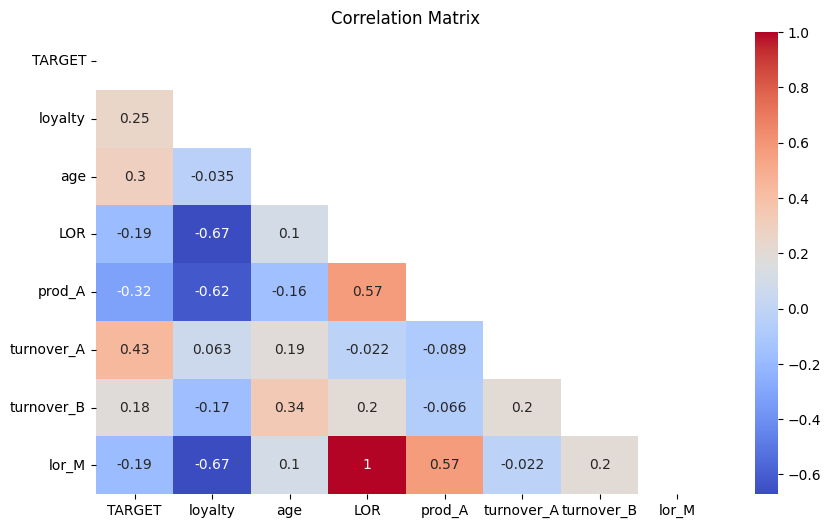

In [48]:
# Calculate correlation matrix
corr_matrix = df_reduced.corr()

# mask for without upperright triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

- This are the correlations after data preparation, which are similar to before with minimal changes in some features.

## Logistic Regression Modeling

In [49]:
# Train Test split
from sklearn.model_selection import train_test_split

X1= df_edited.drop('TARGET', axis=1)
y1= df_edited['TARGET']

X = df_reduced.drop('TARGET', axis=1)
y = df_reduced['TARGET']

# Split on untranformed data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Spliting on transformed data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Shape of raw split
print("Shape of X_train_raw:", X_train_raw.shape)
print("Shape of X_test_raw:", X_test_raw.shape)
print("Shape of y_train_raw:", y_train_raw.shape)
print("Shape of y_test_raw:", y_test_raw.shape)

print()
# Shape of transformed data
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_raw: (11212, 12)
Shape of X_test_raw: (2804, 12)
Shape of y_train_raw: (11212,)
Shape of y_test_raw: (2804,)

Shape of X_train: (11212, 7)
Shape of X_test: (2804, 7)
Shape of y_train: (11212,)
Shape of y_test: (2804,)


In [50]:
# Calculate Null error rate
y_train.values.sum() / y_train.shape[0]



0.4298073492686407

### Null Error Rate

we know that 42.9% of the people in the training set bought new product, we could achieve a training model accuracy of (1 - .429) = 57.1% by simply predicting "will not buy new product" for each Customer. The accuracy you we ae attaining should exceed the __null error rate__. If not,model is unlikely to be of any value.


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import cross_val_score

In [52]:
# Taking features without any transfermation applied
x1 = X_train_raw[['age','turnover_A','turnover_B','lor_M']]

# Model1
model1 = LogisticRegression()


model1.fit(x1, y_train_raw)

# Score
print("Training Score on untransformed data: ", model1.score(x1, y_train_raw))


Training Score on untransformed data:  0.751427042454513


- For untransformed data we got accuracy of 75.14% which is more than Null Error.

In [53]:
# Coeffients
model1.coef_

array([[ 4.08145627, 13.96720156,  3.0720931 , -0.04855023]])

 - Age, Turnover_A and Turnover_B has positive effect that if these features increase customer is more like to buy new product and Turnover_A has more influecne on buying new product

 - Where as lor_M shows negative relation that is customers with less lor_M are more like to buy new product.

In [54]:
# Cross validate model 1
cv_scores = cross_val_score(model1, x1, y_train_raw, cv=5, scoring='accuracy')

# Print the cross-validation scores and mean accuracy
print("Cross-Validation Scores: ", cv_scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))


Cross-Validation Scores:  [0.75256353 0.75657601 0.74665477 0.74977698 0.75691347]
Mean Accuracy: 75.25%


In [55]:
# Taking transformed features
x2 = X_train[['age','turnover_A','turnover_B','lor_M']]

# Model2
model2 = LogisticRegression()


model2.fit(x2, y_train)

# Score
print("Training Score on transformed data: ", model2.score(x2, y_train))



Training Score on transformed data:  0.751427042454513


In [56]:
# Coeffients of model2
model2.coef_

array([[ 4.08145627, 13.96720156,  3.0720931 , -0.04855023]])

In [57]:
# Cross validate model 2
cv_scores = cross_val_score(model2, x2, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores and mean accuracy
print("Cross-Validation Scores: ", cv_scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))


Cross-Validation Scores:  [0.75256353 0.75657601 0.74665477 0.74977698 0.75691347]
Mean Accuracy: 75.25%


- We got same coeffients and score for transformed data with these set of features.

In [58]:
# model3
model3 = LogisticRegression()


model3.fit(X_train, y_train)

# Score
print("Training Score on transformed data: ", model3.score(X_train, y_train))

Training Score on transformed data:  0.745718872636461


- By training on all features of reduced dataset model has accuracy of 74.57%

In [59]:
#Coeffients of model3
model3.coef_

array([[ 6.50641963e-03,  3.80172954e+00,  5.88730264e+00,
        -9.66075945e-01,  1.38707015e+01,  1.50046855e+00,
        -4.94135036e-01]])

In [60]:
X_train.columns

Index(['loyalty', 'age', 'LOR', 'prod_A', 'turnover_A', 'turnover_B', 'lor_M'], dtype='object')

- Loyalty, age, LOR, turnover_A and turnover_B are showing positive relation that is customer with more values of these features are tend to buy a new product and age has maximum positive influence.

- Where as customers with less prod_A and lor_m are more likly to buy new product and prod_A has mamximum negative influence.

In [61]:
# Cross validate model 3
cv_scores = cross_val_score(model2, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores and mean accuracy
print("Cross-Validation Scores: ", cv_scores)
print("Mean Accuracy: {:.2f}%".format(np.mean(cv_scores) * 100))

Cross-Validation Scores:  [0.7280428  0.75033437 0.74487065 0.75200714 0.75066905]
Mean Accuracy: 74.52%


- By evaluating the three models, model1 and model2 are performing same with accuracy of 75.14% and cross validation score of 75.25%

- Third model has accuracy of 74.57% and cross validation score of 74.52%

- We are picking the second model though model1 aslo has same statistics. Model2 is better in computational wise as it is trained on transformed data where model1 is trained on normal data.

## Model Selection and testing on test data

In [62]:
# Predections on test data
X = X_test[['age','turnover_A','turnover_B','lor_M']]

y_pred = model2.predict(X)
y_prob = model2.predict_proba(X)[:, 1]  # Probability estimates for ROC



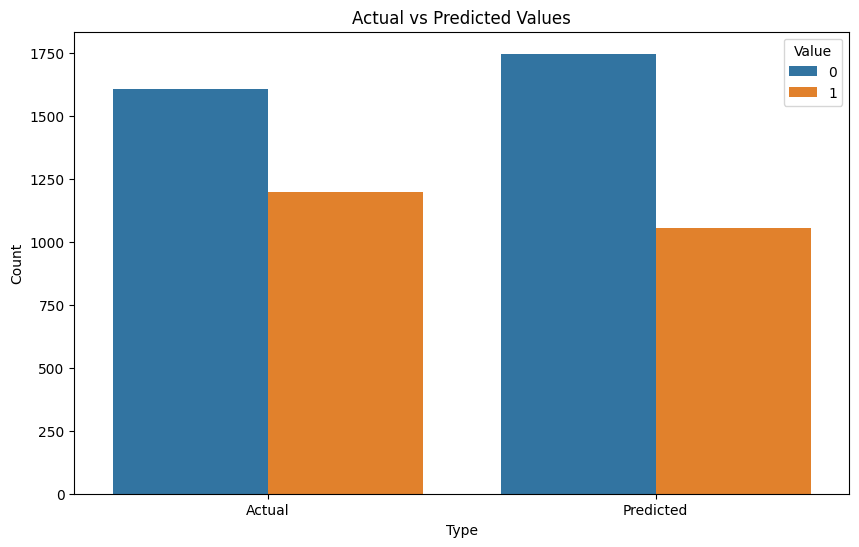

In [75]:
+# Create a DataFrame for actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Visualize the actual vs. predicted values using a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='variable', hue='value', data=pd.melt(results.reset_index(), id_vars=['index'], value_vars=['Actual', 'Predicted']))
plt.title('Actual vs Predicted Values')
plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Value', loc='upper right')
plt.show()

- The above graph shows what are the actual values and predicted vaules of the model.

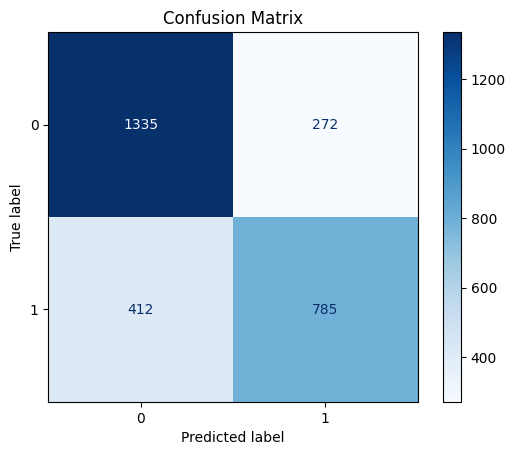

In [64]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

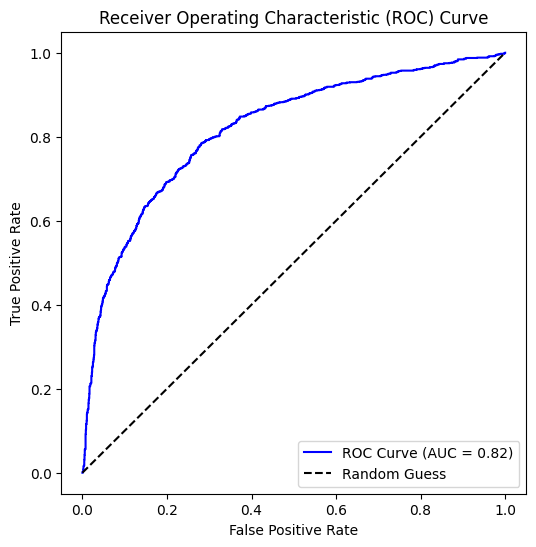

AUC Score: 0.82


In [65]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display AUC score
print(f"AUC Score: {auc_score:.2f}")

In [66]:
# Generate a classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80      1607
           1       0.74      0.66      0.70      1197

    accuracy                           0.76      2804
   macro avg       0.75      0.74      0.75      2804
weighted avg       0.75      0.76      0.75      2804



## Conclusion

- First model which is trained on normal data and second model which is trained on transormed data are showing similar score.

- After selecting the best model from the three logistic regression models and test on training data our model shows accuracy of 76%, precision for classes 1 (Yes) as 74% and 0 (No) as 76% and f1 score as 80% and 70% respectively.